In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 4.0 MB/s 
     |████████████████████████████████| 167 kB 48.3 MB/s 
     |████████████████████████████████| 16.5 MB 254 kB/s 
     |████████████████████████████████| 56 kB 2.6 MB/s 
     |████████████████████████████████| 3.3 MB 21.9 MB/s 
     |████████████████████████████████| 1.7 MB 8.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 325 kB 60.1 MB/s 
     |████████████████████████████████| 1.3 MB 52.5 MB/s 
     |████████████████████████████████| 6.8 MB 37.5 MB/s 
     |████████████████████████████████| 141 kB 65.9 MB/s 
     |████████████████████████████████| 25.8 MB 54.5 MB/s 
     |████████████████████████████████| 88 kB 7.5 MB/s 
     |████████████████████████████████| 5

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"
unfiltered_pk_data = pd.read_csv(url)
unfiltered_pk_data = pd.DataFrame(unfiltered_pk_data)
pk_data = unfiltered_pk_data.drop(["motor_UPDRS"], axis = 1)

data = pk_data.sample(frac = 0.9, random_state = 786)
data_unseen = pk_data.drop(data.index)

data.reset_index(drop = True, inplace = True)
data_unseen.reset_index(drop = True, inplace = True)

In [2]:
print("Data: " + str(pk_data.shape))
print("Data for Modelling: " + str(data.shape))
print("Unseen Data for Prediction: " + str(data_unseen.shape))
pk_data

Data: (5875, 21)
Data for Modelling: (5288, 21)
Unseen Data for Prediction: (587, 21)


,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [3]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 4.2 MB/s 
     |████████████████████████████████| 25.3 MB 1.8 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1


In [4]:
from pycaret.regression import *
x = setup(data = data, target = "total_UPDRS", session_id = 123)

,Description,Value
0,session_id,123
1,Target,total_UPDRS
2,Original Data,"(5288, 21)"
3,Missing Values,False
4,Numeric Features,19
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3701, 18)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='total_UPDRS', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [5]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.2207,0.1567,0.3939,0.9986,0.0180,0.0093,0.878
rf,Random Forest Regressor,0.2766,0.3317,0.5695,0.9971,0.0239,0.0111,2.965
lightgbm,Light Gradient Boosting Machine,0.5976,0.9010,0.9368,0.9922,0.0404,0.0253,0.284
dt,Decision Tree Regressor,0.2391,1.2507,1.0172,0.9892,0.0363,0.0092,0.051
gbr,Gradient Boosting Regressor,2.0680,7.4042,2.7174,0.9357,0.1222,0.0916,1.103
knn,K Neighbors Regressor,4.1232,35.8988,5.9862,0.6881,0.2272,0.1713,0.029
ada,AdaBoost Regressor,5.4525,39.1458,6.2527,0.6598,0.2515,0.2382,0.517
lr,Linear Regression,7.6299,86.8212,9.3162,0.2450,0.3490,0.3327,0.441
br,Bayesian Ridge,7.6520,87.4177,9.3479,0.2399,0.3499,0.3336,0.018
ridge,Ridge Regression,7.6458,87.5963,9.3574,0.2384,0.3505,0.3339,0.013


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [7]:
et = create_model("et")   #Because best-performing model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2080,0.1317,0.3629,0.9988,0.0171,0.0091
1,0.2304,0.1660,0.4074,0.9985,0.0195,0.0099
2,0.1942,0.1259,0.3548,0.9989,0.0144,0.0080
3,0.2146,0.1412,0.3758,0.9988,0.0176,0.0091
4,0.2299,0.1613,0.4017,0.9987,0.0166,0.0092
5,0.1962,0.1218,0.3490,0.9989,0.0200,0.0085
6,0.2317,0.1721,0.4148,0.9985,0.0191,0.0100
7,0.2592,0.2321,0.4817,0.9980,0.0164,0.0097
8,0.2333,0.1809,0.4253,0.9985,0.0213,0.0100


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [8]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.8748,5.5227,2.3500,0.9514,0.1136,0.0866
1,1.7916,5.2078,2.2821,0.9524,0.1042,0.0795
2,1.8141,5.1322,2.2654,0.9551,0.1111,0.0860
3,1.7727,5.2615,2.2938,0.9548,0.1138,0.0840
4,1.7441,5.0253,2.2417,0.9596,0.0939,0.0714
5,1.7949,5.1091,2.2603,0.9552,0.1002,0.0772
6,1.8887,5.6997,2.3874,0.9502,0.1094,0.0864
7,1.9076,5.8968,2.4283,0.9484,0.1011,0.0788
8,1.9096,6.2616,2.5023,0.9478,0.1044,0.0794


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 5
INFO:logs:ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


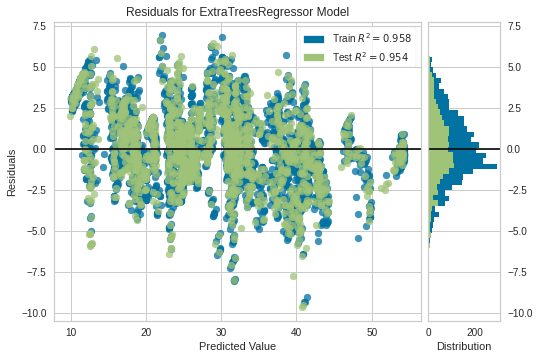

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [9]:
plot_model(tuned_et)

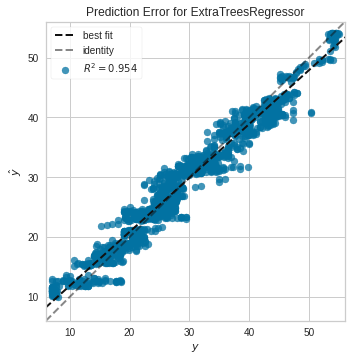

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [10]:
plot_model(tuned_et, plot = "error")

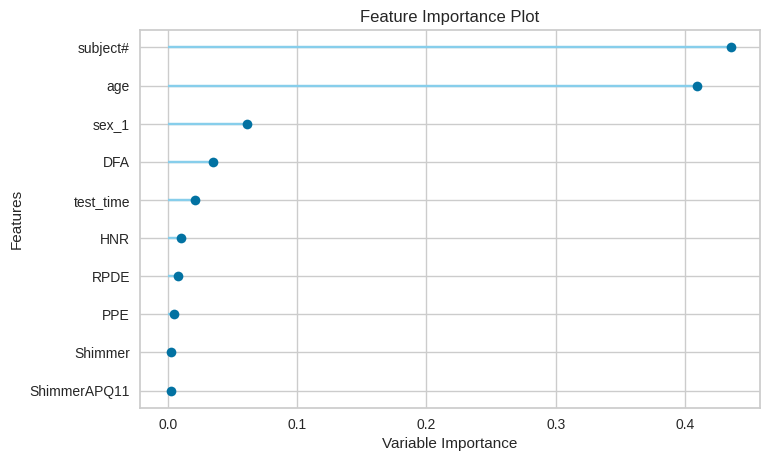

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [11]:
plot_model(tuned_et, plot = "feature")

In [12]:
predict_model(tuned_et)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.7648,5.1128,2.2611,0.9538,0.105,0.0788


,subject#,age,test_time,Jitter(%),Jitter(Abs),JitterPPQ5,JitterDDP,Shimmer,Shimmer(dB),ShimmerAPQ5,ShimmerAPQ11,ShimmerDDA,NHR,HNR,RPDE,DFA,PPE,sex_1,total_UPDRS,Label
0,33.0,66.0,72.412003,0.00662,0.000026,0.00343,0.01038,0.05092,0.463,0.02930,0.03957,0.08780,0.030395,18.784000,0.60339,0.58131,0.29215,1.0,30.148001,30.995631
1,19.0,55.0,117.779999,0.00506,0.000034,0.00223,0.00493,0.01881,0.188,0.01064,0.01410,0.02659,0.011061,25.356001,0.44055,0.67158,0.18952,0.0,26.663000,24.200988
2,16.0,65.0,159.429993,0.00346,0.000034,0.00208,0.00505,0.01962,0.171,0.01173,0.01573,0.03095,0.007856,22.886999,0.53231,0.71290,0.17206,0.0,22.643999,18.539328
3,10.0,58.0,59.354000,0.01109,0.000112,0.00524,0.01804,0.03127,0.320,0.01802,0.02065,0.05242,0.028941,21.955000,0.50247,0.70848,0.28292,0.0,19.000000,20.333867
4,42.0,61.0,149.839996,0.00297,0.000025,0.00147,0.00358,0.02315,0.215,0.01277,0.01904,0.03157,0.011927,22.886000,0.52598,0.56518,0.12621,0.0,32.987999,33.599989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,19.0,55.0,183.820007,0.00983,0.000077,0.00573,0.01659,0.04462,0.405,0.02777,0.03158,0.07592,0.021957,19.681000,0.50804,0.73418,0.32685,0.0,26.103001,25.191133
1583,35.0,71.0,48.886002,0.00521,0.000039,0.00266,0.00618,0.02994,0.286,0.01757,0.03084,0.03869,0.010916,22.344999,0.54795,0.72784,0.21694,0.0,54.556000,53.798221
1584,6.0,63.0,131.339996,0.00442,0.000031,0.00222,0.00556,0.02889,0.287,0.01817,0.02181,0.04735,0.032316,24.035000,0.55170,0.62377,0.14132,0.0,42.688999,39.682902
1585,5.0,75.0,98.410004,0.00389,0.000032,0.00235,0.00533,0.03500,0.315,0.02159,0.02972,0.05626,0.014572,20.596001,0.60077,0.63549,0.17484,0.0,42.231998,41.242058


In [13]:
finalized_et = finalize_model(tuned_et)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    mi

In [14]:
unseen_predictions = predict_model(finalized_et, data = data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.8163,5.3028,2.3028,0.955,0.1056,0.0805


In [15]:
unseen_predictions.head()

,subject#,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,Label
0,1,72,0,40.652,36.870,0.00353,0.000023,0.00119,0.00159,0.00357,...,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.19500,38.375455
1,1,72,0,54.640,37.857,0.00476,0.000025,0.00226,0.00259,0.00678,...,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.23844,38.781815
2,1,72,0,82.653,39.834,0.00537,0.000032,0.00236,0.00278,0.00709,...,0.01001,0.01375,0.02395,0.03003,0.017115,24.204,0.46686,0.57984,0.19390,39.691056
3,1,72,0,96.633,41.034,0.00354,0.000024,0.00142,0.00150,0.00427,...,0.00847,0.01040,0.01920,0.02540,0.015008,24.614,0.61348,0.60661,0.15881,39.753589
4,1,72,0,131.640,44.146,0.00571,0.000037,0.00296,0.00293,0.00889,...,0.01260,0.01466,0.02145,0.03780,0.031546,23.129,0.52714,0.59220,0.18211,41.858423


In [16]:
from pycaret.utils import check_metric

check_metric(unseen_predictions.total_UPDRS, unseen_predictions.Label, "R2")

0.955